# Programming Exercise 8: Recommender Systems

## Introduction

In this exercise, you will implement collaborative filtering to build a recommender system for movies. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. The files included in this assignment are: 

- ex8 movies.mat - Movie Review Dataset
- ex8 movieParams.mat - Parameters provided for debugging
- multivariateGaussian.m - Computes the probability density function for a Gaussian distribution
- visualizeFit.m - 2D plot of a Gaussian distribution and a dataset
- checkCostFunction.m - Gradient checking for collaborative filtering 
- computeNumericalGradient.m - Numerically compute gradients
- fmincg.m - Function minimization routine (similar to fminunc) 
- loadMovieList.m - Loads the list of movies into a cell-array
- movie ids.txt - List of movies
- normalizeRatings.m - Mean normalization for collaborative filtering

You only have to implement one functions:

- cofiCostFunc.m - Implement the cost function for collaborative filtering

The contained files are found in File --> Open... or in the readonly directory under Assignment8b. We highly recommend that you take a look at them as you make progress in this exercise. 

### NOTE:

You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

Instructions will be provided as needed in the exercise. 


#### When you are done and submit the assignment, click here to check your [submission](https://www.coursera.org/learn/machine-learning/programming/9sEW6/recommender-systems). 



Recommender Systems
===================

In here, you will implement the collaborative
filtering learning algorithm and apply it to a dataset of movie
ratings. This dataset consists of ratings on a scale of 1 to 5. The
dataset has $n_u = 943$ users, and $n_m= 1682$ movies. 

In the next parts of this exercise, you will implement the function
cofiCostFunc that computes the collaborative fitlering
objective function and gradient. After implementing the cost function
and gradient, you will use fmincg to learn the parameters for
collaborative filtering.

Movie ratings dataset
---------------------

The first part below will load the dataset
ex8_movies.mat, providing the variables Y and R in
your Octave/MATLAB environment.

The matrix $Y$ (a num_movies $\times$ num_users matrix)
stores the ratings $y^{(i,j)}$ (from 1 to 5). The matrix $R$ is an
binary-valued indicator matrix, where $R(i,j) = 1$ if user $j$ gave a
rating to movie $i$, and $R(i,j)=0$ otherwise. The objective of
collaborative filtering is to predict movie ratings for the movies that
users have not yet rated, that is, the entries with $R(i,j) = 0$. This
will allow us to recommend the movies with the highest predicted ratings
to the user.

To help you understand the matrix Y, the cell
below will compute the average movie rating for the first
movie (Toy Story) and output the average rating to the screen.

Throughout this part of the exercise, you will also be working with the
matrices, X and Theta: 

$$X = 
\begin{bmatrix}
--- (x^{(1)})^T --- \\
--- (x^{(2)})^T --- \\
\vdots \\
--- (x^{(n_m)})^T --- \\
\end{bmatrix} , \quad
{\tt Theta} = 
\begin{bmatrix}
--- (\theta^{(1)})^T --- \\
--- (\theta^{(2)})^T --- \\
\vdots \\
--- (\theta^{(n_u)})^T --- \\
\end{bmatrix}.$$ 

The $i$-th row of X corresponds to the
feature vector $x^{(i)}$ for the $i$-th movie, and the $j$-th row of
Theta corresponds to one parameter vector $\theta^{(j)}$, for the
$j$-th user. Both $x^{(i)}$ and $\theta^{(j)}$ are $n$-dimensional
vectors. For the purposes of this exercise, you will use $n=100$, and
therefore, $x^{(i)}\in\mathbb{R}^{100}$ and
$\theta^{(j)}\in\mathbb{R}^{100}$. Correspondingly, X is a
$n_m \times 100$ matrix and Theta is a $n_u \times 100$ matrix.

We will start by loading the movie ratings dataset to understand the structure of the data.

Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 943 users

R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i.

Average rating for movie 1 (Toy Story): 3.878319 / 5



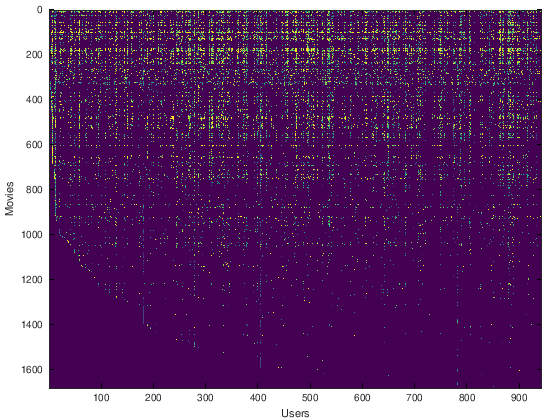

In [2]:
warning('off'); addpath('../../readonly/Assignment8b/');
load ('ex8_movies.mat');         %  Load data

%  From the matrix, we can compute statistics like average rating.
fprintf('Average rating for movie 1 (Toy Story): %f / 5\n\n', ...
        mean(Y(1, R(1, :))));

imagesc(Y);             %  We can "visualize" the ratings matrix by plotting it with imagesc
ylabel('Movies');
xlabel('Users');

Collaborative filtering learning algorithm
------------------------------------------

Now, you will start implementing the collaborative filtering learning
algorithm. You will start by implementing the cost function (without
regularization).

The collaborative filtering algorithm in the setting of movie
recommendations considers a set of $n$-dimensional parameter vectors
$x^{(1)},...,x^{(n_m)}$ and $\theta^{(1)},...,\theta^{(n_u)}$, where the
model predicts the rating for movie $i$ by user $j$ as
$y^{(i,j)} = (\theta^{(j)})^Tx^{(i)}$. Given a dataset that consists of
a set of ratings produced by some users on some movies, you wish to
learn the parameter vectors $x^{(1)},...,x^{(n_m)},
\theta^{(1)},...,\theta^{(n_u)}$ that produce the best fit (minimizes
the squared error).

You will complete the code in cofiCostFunc to compute the cost
function and gradient for collaborative filtering. Note that the
parameters to the function (i.e., the values that you are trying to
learn) are $X$ and $Theta$. In order to use an off-the-shelf
minimizer such as fmin, the cost function has been set up to
unroll the parameters into a single vector **params**. You had
previously used the same vector unrolling method in the neural networks
programming exercise.

### Collaborative filtering cost function

The collaborative filtering cost function (without regularization) is
given by

$$J({x^{(1)},...,x^{(n_m)}, \theta^{(1)},...,\theta^{(n_u)}})= \frac{1}{2}\sum_{(i,j):r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)})^2.\tag{1}$$

You should now modify cofiCostFunc to return this cost in the
variable. Note that you should be accumulating the cost for
user $j$ and movie $i$ only if $R(i,j) = 1$.

**Implementation**: 
 
[J, grad] = **COFICOSTFUNC**(params, Y, R, num_users, num_movies, num_features, lambda) returns the cost and gradient for the collaborative filtering problem. You should compute the cost function and gradient for collaborative
              filtering. Concretely, you should first implement the cost
              function (without regularization) and make sure it is
              matches our costs
              . After that, you should implement the 
              gradient and use the checkCostFunction routine to check
              that the gradient is correct. Finally, you should implement regularization.

**X** = num_movies  x num_features matrix of movie features
       
**Theta** = num_users  x num_features matrix of user features

**Y** = num_movies x num_users matrix of user ratings of movies

**R** = num_movies x num_users matrix, where R(i, j) = 1 if the i-th movie was rated by the j-th user

You should set the following variables correctly:

**X_grad** = num_movies x num_features matrix, containing the 
                partial derivatives w.r.t. to each element of X
       
**Theta_grad** = num_users x num_features matrix, containing the 
                    partial derivatives w.r.t. to each element of Theta


<table border = "0" width = "550" ><tr><td> 

**Implementation Note**: We strongly encourage you to use a vectorized implementation to compute
$J$, since it will later by called many times by the optimization
package fmincg. As usual, it might be easiest to first write a
non-vectorized implementation (to make sure you have the right answer),
and the modify it to become a vectorized implementation (checking that
the vectorization steps don’t change your algorithm’s output). To come
up with a vectorized implementation, the following tip might be helpful:
You can use the R matrix to set selected entries to 0. For
example, R .\* M will do an element-wise multiplication between
M and R; since R only has elements with values
either 0 or 1, this has the effect of setting the elements of M
to 0 only when the corresponding value in R is 0. Hence,
sum(sum(R.\*M)) is the sum of all the elements of M for
which the corresponding element in R equals 1.  <br /> 

</td></tr></table>

In [5]:
% GRADED FUNCTION: cofiCostFunc
function [J, grad] = cofiCostFunc(params, Y, R, num_users, num_movies, ...
                                  num_features, lambda)


% Unfold the U and W matrices from params
X = reshape(params(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(params(num_movies*num_features+1:end), ...
                num_users, num_features);

            
% You need to return the following values correctly
J = 0;
X_grad = zeros(size(X));
Theta_grad = zeros(size(Theta));

% ====================== YOUR CODE HERE ======================
h = X * Theta';
orig = 1/2 * sum(sum(((h - Y).^2) .* R));
thet_term = lambda/2 * sum(sum(Theta .^ 2));
X_term = lambda/2 * sum(sum(X .^ 2));

J = orig + thet_term + X_term;


% To make things easier, always think 
% of this in terms of dimensions
X_grad = ((h-Y).* R * Theta) + lambda * X;
Theta_grad = (((h-Y) .* R)' * X) + lambda * Theta;

% =============================================================

grad = [X_grad(:); Theta_grad(:)];

end

In [6]:
% Calculate your cost
load ('ex8_movieParams.mat');      %  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)

num_users = 4; num_movies = 5; num_features = 3;    %  Reduce the data set size so that this runs faster
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);

J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...   %  Evaluate cost function
               num_features, 0);
J

J =  22.225


**Expected Final Regularized Cost**:

Cost at loaded parameters is
$22.22$.

### Collaborative filtering gradient

Now, you should implement the gradient (without regularization).
Specifically, you should complete the code in *cofiCostFunc* to
return the variables X_grad and Theta_grad. Note that
X_grad should be a matrix of the same size as $X$ and
similarly, Theta_grad is a matrix of the same size as
Theta. The gradients of the cost function is given by:

$$\frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)})\theta_k^{(j)}\tag{2}$$

$$\frac{\partial J}{\partial \theta_k^{(j)}} = \sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)})x_k^{(i)}.\tag{3}$$

Note that the function returns the gradient for both sets of variables
by unrolling them into a single vector. After you have completed the
code to compute the gradients, we will run a
gradient check (*checkCostFunction*) to numerically check the
implementation of your gradients. If your implementation is correct,
you should find that the analytical and numerical gradients match up
closely.

<table border = "0" width = "550" ><tr><td> 

**Implementation Note:** You can get full credit for this assignment without
using a vectorized implementation, but your code will run much more
slowly (a small number of hours), and so we recommend that you try to
vectorize your implementation.
To get started, you can implement the gradient with a for-loop over
movies (for computing $\frac{\partial J}{\partial x_k^{(i)}}$) and a
for-loop over users (for computing $\frac{\partial J}{\partial
\theta_k^{(j)}}$). When you first implement the gradient, you might
start with an unvectorized version, by implementing another inner
for-loop that computes each element in the summation. After you have
completed the gradient computation this way, you should try to vectorize
your implementation (vectorize the inner for-loops), so that you’re left
with only two for-loops (one for looping over movies to compute
$\frac{\partial J}{\partial x_k^{(i)}}$ for each movie, and one for
looping over users to compute
$\frac{\partial J}{\partial \theta_k^{(j)}}$ for each user).  <br /> 

</td></tr></table>

**Implementation Tip:** To perform the vectorization, you might find this helpful: You should come up
with a way to compute all the derivatives associated with 
$x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)}$ (i.e., the derivative terms associated 
with the feature vector $x^{(i)}$) at the same time.  Let us define the derivatives
for the feature vector of the $i$-th movie as:

$$(X_{grad}(i, :))^T = \begin{bmatrix}
\frac{ \partial J}{ \partial x_1^{(i)}} \\
\frac{\partial J}{\partial x_2^{(i)}} \\
\vdots \\
\frac{ \partial J}{ \partial x_n^{(i)}}
\end{bmatrix}=
\sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)}) \theta^{(j)}\tag{4}$$

To vectorize the above expression, you can start by indexing into $Theta$ and
$Y$ to select only the elements of interests (that is, those with $r(i,j)=1$).
Intuitively, when you consider the features for the $i$-th movie, you only need
to be concern about the users who had given ratings to the movie, and this allows
you to remove all the other users from Theta and Y. 

Concretely, you can set idx = find(R(i, :)==1) to be a list of all the 
users that have rated movie $i$. This will allow you to create the temporary 
matrices ${\tt Theta_{temp} = Theta(idx, :)}$ and $Y_{temp} = Y(i, idx)$
that index into  Theta and Y to give you only the set of users which 
have rated the $i$-th movie. This will allow you to write the derivatives as:

$$ X_{grad}(i, :) = (X(i, :) * Theta_{temp}^T - Y_{temp}) * Theta_{temp}\tag{5}$$

(Note: The vectorized computation above returns a row-vector instead.) 

After you have vectorized the computations of the derivatives with respect to $x^{(i)}$,
you should use a similar method to vectorize the derivatives with respect to
$\theta^{(j)}$ as well. 


In [7]:
% Checking if the grad argument in your cofiCostFunc is working
checkCostFunction;

   0.00000   0.00000
  -0.55086  -0.55086
  -0.00807  -0.00807
  -1.00446  -1.00446
   0.00000   0.00000
   0.22348   0.22348
   2.15879   2.15879
   0.10379   0.10379
   0.00000   0.00000
  -0.45578  -0.45578
   1.15163   1.15163
   0.36972   0.36972
   0.13838   0.13838
   0.18464   0.18464
  -1.07769  -1.07769
   0.99914   0.99914
  -0.11405  -0.11405
   0.16516   0.16516
  -0.36079  -0.36079
   0.37645   0.37645
   0.39164   0.39164
   0.22286   0.22286
   0.61092   0.61092
   0.84221   0.84221
   1.56292   1.56292
   1.10415   1.10415
  -0.52024  -0.52024
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.01149e-12


### Regularized cost function

The cost function for collaborative filtering with regularization is
given by

$$
J({x^{(1)},...,x^{(n_m)}, \theta^{(1)},...,\theta^{(n_u)}}) = 
 \frac{1}{2}\sum_{(i,j):r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)})^2 + 
 \left(\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^{n}(\theta_k^{(j)})^2\right)
+ \left(\frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^{n}(x_k^{(i)})^2\right).\tag{6}$$

You should now add regularization to your original computations of the
cost function, $J$. After you are done, run the cell below to check your regularized cost function.

In [8]:
%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 1.5)
               

J =  31.344


**Expected Output**:

31.34

### Regularized gradient

Now that you have implemented the regularized cost function, you should
proceed to implement regularization for the gradient. You should add to
your implementation in *cofiCostFunc* to return the regularized
gradient by adding the contributions from the regularization terms. Note
that the gradients for the regularized cost function is given by:

$$\frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)})\theta_k^{(j)} + \lambda x_k^{(i)}\tag{7}$$

$$\frac{\partial J}{\partial \theta_k^{(j)}} = \sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)} - y^{(i,j)})x_k^{(i)} + \lambda \theta_k^{(j)}\tag{8}$$

This means that you just need to add $\lambda x^{(i)}$ to the
X_grad(i,:) variable described earlier, and add
$\lambda \theta^{(j)}$ to the Theta_grad(j,:) variable described
earlier.

After you have completed the code to compute the gradients, run the cell below for another gradient check
(checkCostFunction) to numerically check the implementation of your gradients.

In [9]:
%  Check gradients by running checkNNGradients
checkCostFunction(1.5);

    5.47534    5.47534
    1.72067    1.72067
  -10.59314  -10.59314
   10.52824   10.52824
   -2.07019   -2.07019
   -1.14824   -1.14824
    2.12340    2.12340
   -3.63251   -3.63251
   -0.23649   -0.23649
   -1.46057   -1.46057
    0.26132    0.26132
   -1.36095   -1.36095
    0.18874    0.18874
    1.66230    1.66230
    1.82927    1.82927
   -8.32852   -8.32852
   -9.81194   -9.81194
   -1.73248   -1.73248
   -0.51560   -0.51560
   -0.86558   -0.86558
    3.30193    3.30193
   -0.18243   -0.18243
    1.91456    1.91456
    0.43987    0.43987
   -1.79833   -1.79833
   -3.98228   -3.98228
   -4.69094   -4.69094
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 2.50356e-12


Learning movie recommendations
------------------------------

After you have finished implementing the collaborative filtering cost
function and gradient, you can now start training your algorithm to make
movie recommendations for yourself. In the cell below, you can enter your own movie preferences, so
that later when the algorithm runs, you can get your own movie
recommendations! We have filled out some values according to our own
preferences, but you should change this according to your own tastes.
The list of all movies and their number in the dataset can be found
listed in the file movie_idx.txt.

### Recommendations

<table border = "0" width = "440" ><tr><td> 
Top recommendations for you: <br>
Predicting rating 9.0 for movie Titanic (1997)  <br> 
Predicting rating 8.9 for movie Star Wars (1977)<br>
Predicting rating 8.8 for movie Shawshank Redemption, The (1994)<br>
Predicting rating 8.5 for movie As Good As It Gets (1997)<br>
Predicting rating 8.5 for movie Good Will Hunting (1997)<br>
Predicting rating 8.5 for movie Usual Suspects, The (1995)<br>
Predicting rating 8.5 for movie Schindler's List (1993)<br>
Predicting rating 8.4 for movie Raiders of the Lost Ark (1981)<br>
Predicting rating 8.4 for movie Empire Strikes Back, The (1980)<br>
Predicting rating 8.4 for movie Braveheart (1995)<br>
 <br>
Original ratings provided:   <br>
Rated 4 for Toy Story (1995)  <br>
Rated 3 for Twelve Monkeys (1995) <br>
Rated 5 for Usual Suspects, The (1995) <br>
Rated 4 for Outbreak (1995)  <br>
Rated 5 for Shawshank Redemption, The (1994)  <br>
Rated 3 for While You Were Sleeping (1995) <br>
Rated 5 for Forrest Gump (1994) <br>
Rated 2 for Silence of the Lambs, The (1991)  <br>
Rated 4 for Alien (1979)  <br>
Rated 5 for Die Hard 2 (1990)  <br>
Rated 5 for Sphere (1998)  
<caption><center> Figure 4 </center> </caption>
</td></tr></table>

After the additional ratings have been added to the dataset, the script
will proceed to train the collaborative filtering model. This will learn
the parameters X and Theta. To predict the rating of movie
$i$ for user $j$, you need to compute $(\theta^{(j)})^Tx^{(i)}$. The
next part of the script computes the ratings for all the movies and
users and displays the movies that it recommends (Figure
4), according to ratings that were entered earlier in
the script. Note that you might obtain a different set of the
predictions due to different random initializations.


Before we will train the collaborative filtering model, we will first
add ratings that correspond to a new user that we just observed. This
part of the code will also allow you to put in your own ratings for the
movies in our dataset!


In [10]:
movieList = loadMovieList();

my_ratings = zeros(1682, 1);          %  Initialize my ratings

% Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings(1) = 4;

% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings(98) = 2;

% We have selected a few movies we liked / did not like and the ratings we
% gave are as follows:
my_ratings(7) = 3;
my_ratings(12)= 5;
my_ratings(54) = 4;
my_ratings(64)= 5;
my_ratings(66)= 3;
my_ratings(69) = 5;
my_ratings(183) = 4;
my_ratings(226) = 5;
my_ratings(355)= 5;

fprintf('\n\nNew user ratings:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


Now, you will train the collaborative filtering model on a movie rating dataset of 1682 movies and 943 users. Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by  943 users. R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i.

In [11]:
load('ex8_movies.mat');      %  Load data

%  Add our own ratings to the data matrix
Y = [my_ratings Y];
R = [(my_ratings ~= 0) R];

%  Normalize Ratings
[Ynorm, Ymean] = normalizeRatings(Y, R);

%  Useful Values
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = 10;

% Set Initial Parameters (Theta, X)
X = randn(num_movies, num_features);
Theta = randn(num_users, num_features);

initial_parameters = [X(:); Theta(:)];

% Set options for fmincg
options = optimset('GradObj', 'on', 'MaxIter', 100);

% Set Regularization
lambda = 1;
theta = fmincg (@(t)(cofiCostFunc(t, Ynorm, R, num_users, num_movies, ...
                                num_features, lambda)), ...
                initial_parameters, options);

% Unfold the returned theta back into U and W
X = reshape(theta(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(theta(num_movies*num_features+1:end), ...
                num_users, num_features);

Iteration   100 | Cost: 2.674551e+04


Finally, we could compute our prediction matrix!!

In [12]:
p = X * Theta';
my_predictions = p(:,1) + Ymean;

movieList = loadMovieList();

[r, ix] = sort(my_predictions, 'descend');
fprintf('\nTop recommendations for you:\n');
for i=1:10
    j = ix(i);
    fprintf('Predicting rating %.1f for movie %s\n', my_predictions(j), ...
            movieList{j});
end

fprintf('\n\nOriginal ratings provided:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



Top recommendations for you:
Predicting rating 5.5 for movie Star Wars (1977)
Predicting rating 5.4 for movie Return of the Jedi (1983)
Predicting rating 5.3 for movie Heavy Metal (1981)
Predicting rating 5.3 for movie Empire Strikes Back, The (1980)
Predicting rating 5.2 for movie Die xue shuang xiong (Killer, The) (1989)
Predicting rating 5.2 for movie Paths of Glory (1957)
Predicting rating 5.2 for movie Big Lebowski, The (1998)
Predicting rating 5.1 for movie Raiders of the Lost Ark (1981)
Predicting rating 5.1 for movie Welcome To Sarajevo (1997)
Predicting rating 5.1 for movie Independence Day (ID4) (1996)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
